[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 11.37

Analysis of hourly temperature data from 2015 at 134 weather stations in the United States\
Topics: Sample covariance matrix, singular value decomposition, principal component analysis, low-rank model

Author: Carlos Fernandez-Granda\
Data source: https://www1.ncdc.noaa.gov/pub/data/uscrn/products/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

font_size = 15
font_size_ticks = 15

np.set_printoptions(precision=3)

file_name_temperature_2015 = "../data/weather/temperatures_2015.npy"
file_name_longitudes = "../data/weather/longitudes.npy"
file_name_latitudes = "../data/weather/latitudes.npy"

data_matrix = np.load(file_name_temperature_2015)
longitudes = np.load(file_name_longitudes)
latitudes = np.load(file_name_latitudes)

file_name_list = np.load('../data/weather/weather_station_names.npy')

def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

In [3]:
def remove_faulty_measurements(data,verbose):
    min_val = -100 # We assume temperatures cannot be lower than -100
    for ind in range(len(data)):
        median = np.median(data[data > min_val])
        if data[ind] < min_val:
            if verbose:
                print(str(ind) + ": " + str(data[ind]))
            aux_ind = ind-1
            while aux_ind > 0:
                if data[aux_ind] > min_val:
                    data[ind] = data[aux_ind]
                    if verbose:
                        print("changed to entry " + str(aux_ind) + ": " + str(data[ind]))
                    break
                else:
                    ind -= 1
    return data

verbose = False
for ind in range(data_matrix.shape[1]):
    if verbose:
        print(ind)
    data_matrix[:,ind] = remove_faulty_measurements(data_matrix[:,ind],verbose)

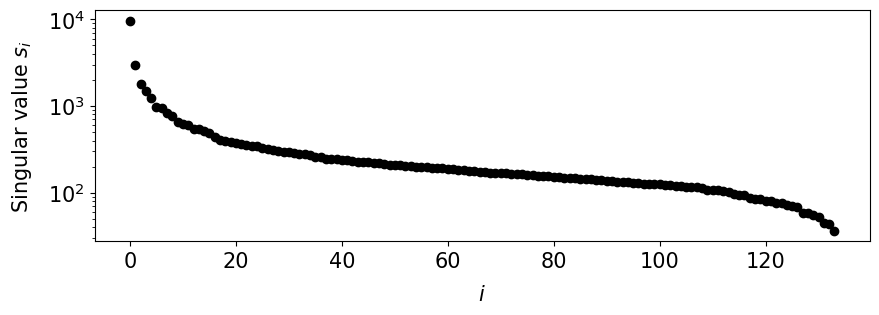

In [7]:
def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

mean = np.mean(data_matrix,axis=0)
# We center by removing the mean temperature at each weather station
data_matrix_centered = data_matrix - mean

um, s, vT = np.linalg.svd(data_matrix_centered.T, full_matrices=True)
u = -um
v = -vT.T

plt.figure(figsize=(10,3))
plt.semilogy(s,linestyle="None",marker='o',color='black')
plt.ylabel(r'Singular value $s_i$',fontsize=font_size,labelpad=10)
plt.xlabel(r'$i$',fontsize=font_size,labelpad=10)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks);

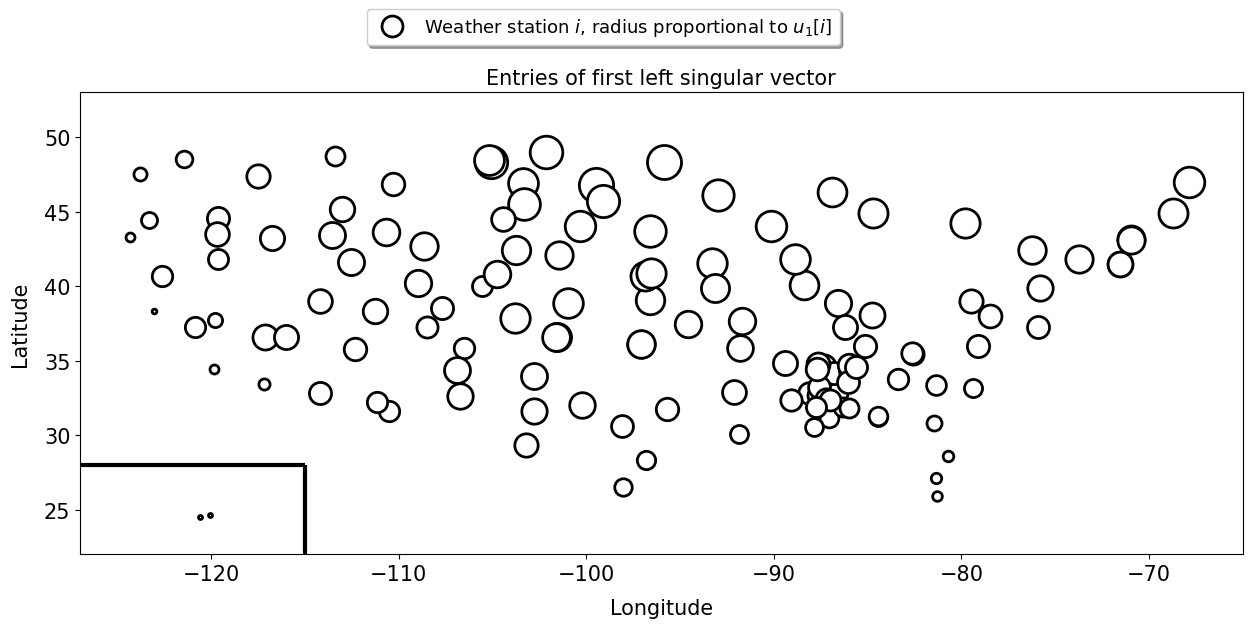

In [9]:
coeff_marker = 200
plt.figure(figsize=(15,6))
for ind in range(len(longitudes)):
    if longitudes[ind] < -150:
        plt.plot(longitudes[ind]+35,latitudes[ind]+5,'o',ms=coeff_marker*u[ind,0],markeredgecolor="black",markeredgewidth=2,
                     markerfacecolor="white")
    else:
        if ind == 1:
            plt.plot(longitudes[ind],latitudes[ind],'o',ms=coeff_marker*u[ind,0],markeredgecolor="black",markeredgewidth=2,
                     markerfacecolor="white",label=r"Weather station $i$, radius proportional to $u_1[i]$")
        else:
            plt.plot(longitudes[ind],latitudes[ind],'o',ms=coeff_marker*u[ind,0],markeredgecolor="black",markeredgewidth=2,
                     markerfacecolor="white")
plt.ylim([22,53])
plt.xlim([-127,-65])
plt.vlines(-115,22,28,lw=3,color="black")
plt.hlines(28,-115,-127,lw=3,color="black")
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylabel('Latitude',fontsize=font_size,labelpad=10)
plt.xlabel('Longitude',fontsize=font_size,labelpad=10)
plt.legend(fontsize=font_size_ticks-2,loc='upper center', bbox_to_anchor=(0.45, 1.2),
          fancybox=True, shadow=True, ncol=1)
plt.title('Entries of first left singular vector',fontsize=font_size);

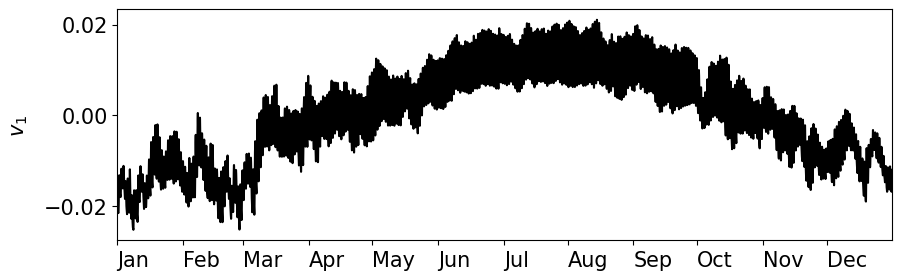

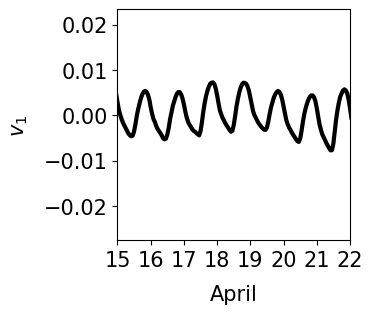

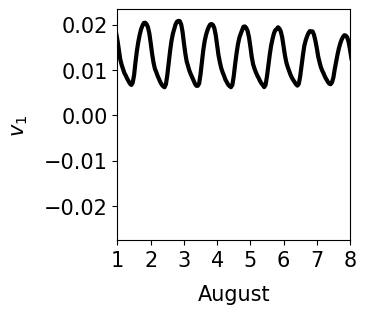

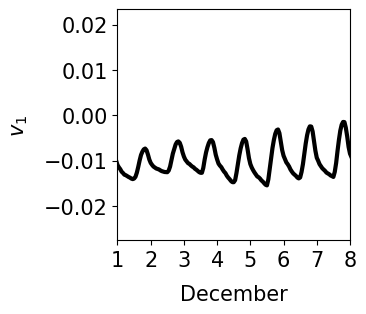

In [11]:
plt.figure(figsize=(10,3))
plt.plot(v[:,0],label=str(ind+1),color="black")
xtick_labels = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
xtick_vals = 24*np.cumsum(np.array([0,31,28,31,30,31,31,30,31,30,31,30]))
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks)
plt.tick_params(labelsize=font_size_ticks)
plt.xlim([0,data_matrix_centered.shape[0]])
ax = plt.gca()
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.ylabel(r'$v_1$',fontsize=font_size,labelpad=10)

plt.figure(figsize=(3,3))
plt.plot(v[:,0],color="black",lw=3,label=r"$v_1$")
xtick_labels = ['15', '16','17','18','19','20','21','22']
days_times_hours =24 * (31 + 28 +31+15) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlim([days_times_hours,days_times_hours+7*24])
plt.ylabel(r'$v_1$',fontsize=font_size,labelpad=10)
plt.xlabel('April',fontsize=font_size,labelpad=10)
    
plt.figure(figsize=(3,3))
plt.plot(v[:,0],label=str(ind+1),color="black",lw=3)
xtick_labels = ['1', '2','3','4','5','6','7','8']
days_times_hours =24 * (31 + 28 +31 + 30 + 31+30+31) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlim([days_times_hours,days_times_hours+7*24])
plt.ylabel(r'$v_1$',fontsize=font_size,labelpad=10)
plt.xlabel('August',fontsize=font_size,labelpad=10)
    
plt.figure(figsize=(3,3))
plt.plot(v[:,0],label=str(ind+1),color="black",lw=3)
xtick_labels = ['1', '2','3','4','5','6','7','8']
days_times_hours =24 * (31 + 28 +31 + 30 + 31+30+31+31+30+31+30) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
#plt.tick_params(labelsize=font_size_ticks)
plt.xlim([days_times_hours,days_times_hours+7*24])
plt.ylabel(r'$v_1$',fontsize=font_size,labelpad=10)
plt.xlabel('December',fontsize=font_size,labelpad=10);

In [14]:
ind_bodega = 24
ind_corvallis = 100
ind_kingston = 105 # kingston 59 ontario 98 rhode island 105

print("Corvallis")
print("Mean",round(mean[ind_corvallis],2))
print("u_1",round(u[ind_corvallis,0],3))
print("s_1 u_1",round(s[0] * u[ind_corvallis,0],2))
print("u_2",round(u[ind_corvallis,1],3))
print("s_2 u_2",round(s[1] * u[ind_corvallis,1],2))

print("Kingston")
print("Mean",round(mean[ind_kingston],2))
print("u_1",round(u[ind_kingston,0],3))
print("s_1 u_1",round(s[0] * u[ind_kingston,0],2))
print("u_2",round(u[ind_kingston,1],3))
print("s_2 u_2",round(s[1] * u[ind_kingston,1],2))

Corvallis
Mean 12.3
u_1 0.058
s_1 u_1 554.09
u_2 -0.073
s_2 u_2 -218.36
Kingston
Mean 9.72
u_1 0.089
s_1 u_1 853.48
u_2 0.104
s_2 u_2 311.26


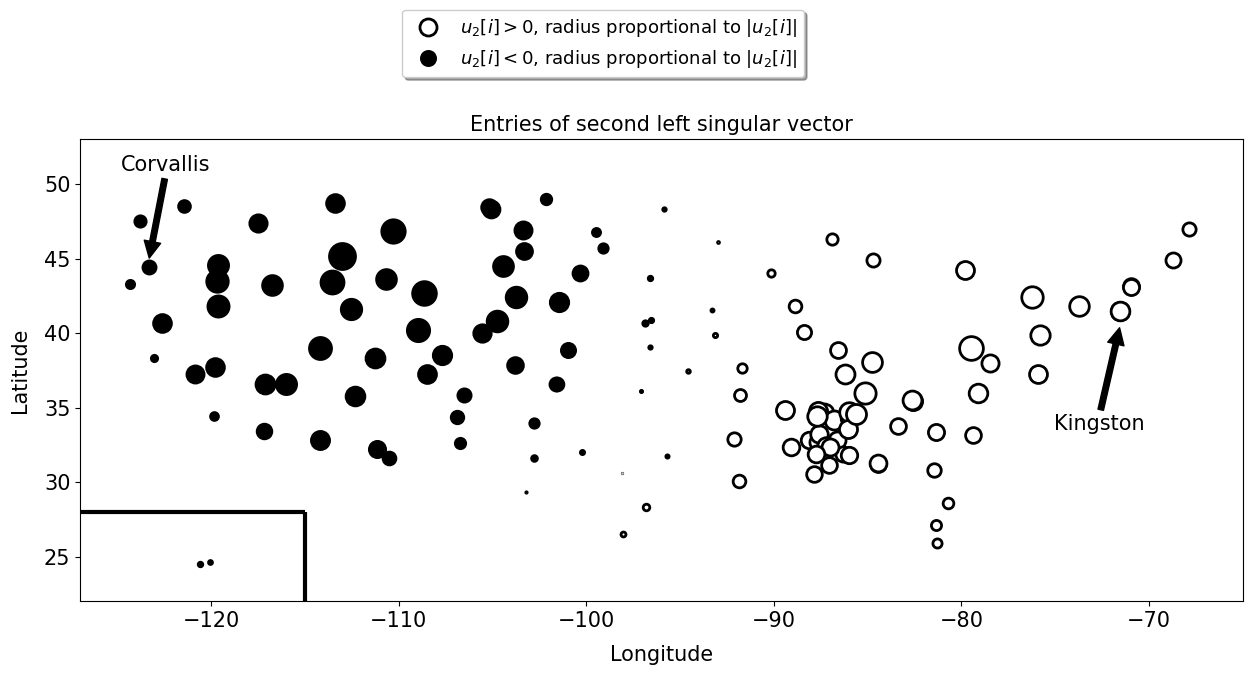

In [17]:
coeff_marker = 130

plt.figure(figsize=(15,6))
for ind in range(len(longitudes)):
    if longitudes[ind] < -150:
        if u[ind,1] > 0:
            plt.plot(longitudes[ind]+35,latitudes[ind]+5,'o',ms=coeff_marker*u[ind,1],color="black",markeredgewidth=2,
                     markerfacecolor="white")
        else:
            plt.plot(longitudes[ind]+35,latitudes[ind]+5,'o',ms=-coeff_marker*u[ind,1],color="black",markeredgewidth=2,
                     markerfacecolor="black")
    else:
        if u[ind,1] > 0:
            if ind == 1:
                plt.plot(longitudes[ind],latitudes[ind],'o',ms=coeff_marker*u[ind,1],color="black",markeredgewidth=2,
                     markerfacecolor="white",label=r"$u_2[i]>0$, radius proportional to $|u_2[i]|$")
            else:
                plt.plot(longitudes[ind],latitudes[ind],'o',ms=coeff_marker*u[ind,1],color="black",markeredgewidth=2,
                     markerfacecolor="white")
        else:
            if ind == 53:
                plt.plot(longitudes[ind],latitudes[ind],'o',ms=-coeff_marker*u[ind,1],color="black",markeredgewidth=2,
                     markerfacecolor="black",label=r"$u_2[i]<0$, radius proportional to $|u_2[i]|$")
            else:
                plt.plot(longitudes[ind],latitudes[ind],'o',ms=-coeff_marker*u[ind,1],markeredgecolor="black",markeredgewidth=2,
                     markerfacecolor="black")
plt.annotate("Corvallis",
            xy=(longitudes[ind_corvallis]+0,latitudes[ind_corvallis]+0.5), xycoords='data',
            xytext=(longitudes[ind_corvallis]-1.5,latitudes[ind_corvallis]+6.5),fontsize=font_size_ticks,
                arrowprops=dict(facecolor='black', shrink=0.02))
plt.annotate("Kingston",
            xy=(longitudes[ind_kingston]+0,latitudes[ind_kingston]-1), xycoords='data',
            xytext=(longitudes[ind_kingston]-3.5,latitudes[ind_kingston]-8),fontsize=font_size_ticks,
                arrowprops=dict(facecolor='black', shrink=0.02))
plt.legend(fontsize=font_size_ticks-2,loc='upper center', bbox_to_anchor=(0.45, 1.3),
          fancybox=True, shadow=True, ncol=1)            
plt.ylim([22,53])
plt.xlim([-127,-65])
plt.vlines(-115,22,28,lw=3,color="black")
plt.hlines(28,-115,-127,lw=3,color="black")
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylabel('Latitude',fontsize=font_size,labelpad=10)
plt.xlabel('Longitude',fontsize=font_size,labelpad=10)
plt.title('Entries of second left singular vector',fontsize=font_size);

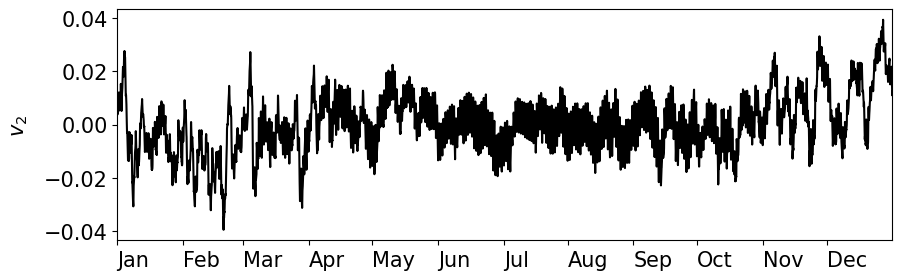

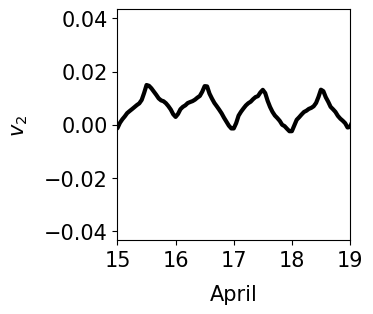

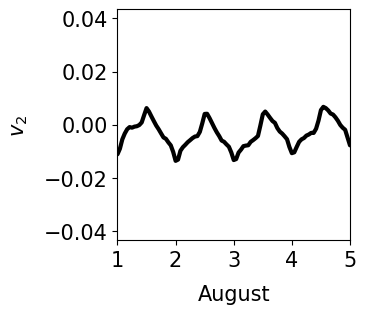

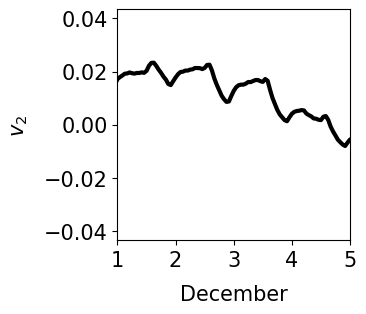

In [20]:
plt.figure(figsize=(10,3))
plt.plot(v[:,1],label=str(ind+1),color="black")
plt.ylabel(r'$v_2$',fontsize=font_size,labelpad=10)
xtick_labels = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
xtick_vals = 24*np.cumsum(np.array([0,31,28,31,30,31,31,30,31,30,31,30]))
plt.yticks(fontsize=font_size_ticks)
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size_ticks)
plt.xlim([0,data_matrix_centered.shape[0]])
ax = plt.gca()
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")

plt.figure(figsize=(3,3))
plt.plot(v[:,1],color="black",lw=3,label=r"$v_2$")
xtick_labels = ['15', '16','17','18','19','20','21','22']
days_times_hours =24 * (31 + 28 +31+15) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlim([days_times_hours,days_times_hours+4*24])
plt.ylabel(r'$v_2$',fontsize=font_size,labelpad=10)
plt.xlabel('April',fontsize=font_size,labelpad=10)
    
plt.figure(figsize=(3,3))
plt.plot(v[:,1],color="black",lw=3,label=r"$v_2$")
xtick_labels = ['1', '2','3','4','5','6','7','8']
days_times_hours =24 * (31 + 28 +31 + 30 + 31+30+31) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlim([days_times_hours,days_times_hours+4*24])
plt.ylabel(r'$v_2$',fontsize=font_size,labelpad=10)
plt.xlabel('August',fontsize=font_size,labelpad=10)
    
plt.figure(figsize=(3,3))
plt.plot(v[:,1],color="black",lw=3,label=r"$v_2$")
xtick_labels = ['1', '2','3','4','5','6','7','8']
days_times_hours =24 * (31 + 28 +31 + 30 + 31+30+31+31+30+31+30) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlim([days_times_hours,days_times_hours+4*24])
plt.ylabel(r'$v_2$',fontsize=font_size,labelpad=10)
plt.xlabel('December',fontsize=font_size,labelpad=10);

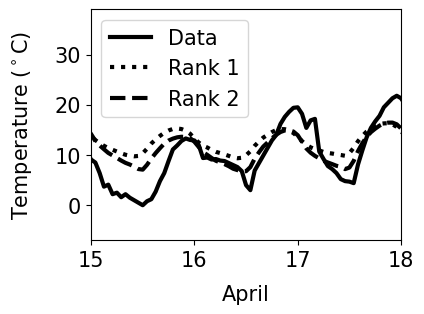

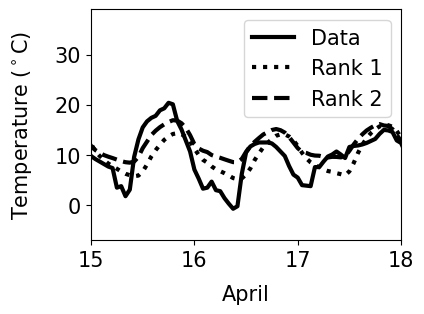

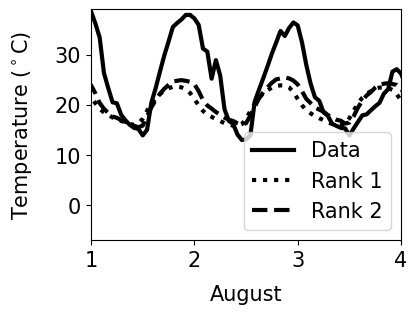

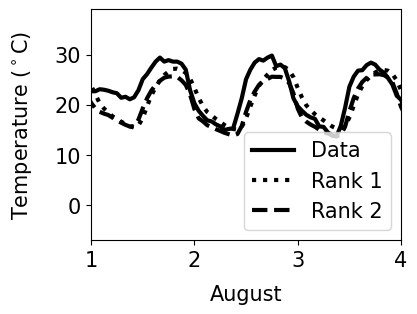

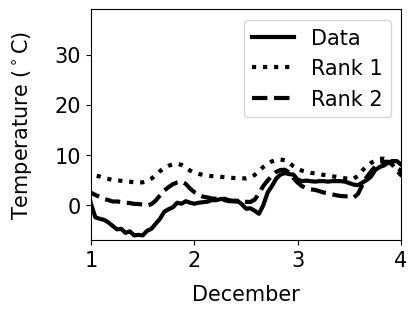

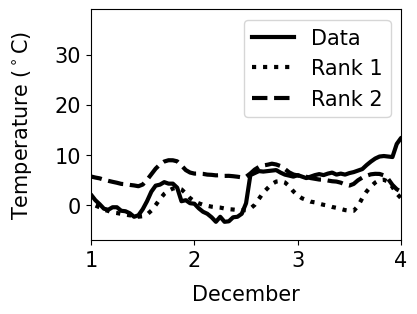

In [22]:
bodega_data = data_matrix[:,ind_bodega]
bodega_1 = mean[ind_bodega] + s[0] * u[ind_bodega,0] * v[:,0]
bodega_1 = mean[ind_bodega] + s[0] * u[ind_bodega,0] * v[:,0] + s[1] * u[ind_bodega,1] * v[:,1]
corvallis_data = data_matrix[:,ind_corvallis]
corvallis_1 = mean[ind_corvallis] + s[0] * u[ind_corvallis,0] * v[:,0]
corvallis_2 = mean[ind_corvallis] + s[0] * u[ind_corvallis,0] * v[:,0] + s[1] * u[ind_corvallis,1] * v[:,1]
kingston_data = data_matrix[:,ind_kingston]
kingston_1 = mean[ind_kingston] + s[0] * u[ind_kingston,0] * v[:,0]
kingston_2 = mean[ind_kingston] + s[0] * u[ind_kingston,0] * v[:,0] + s[1] * u[ind_kingston,1] * v[:,1]

ylim_max = 39
ylim_min = -7

plt.figure(figsize=(4,3))
plt.plot(corvallis_data,color="black",ls="solid",lw=3,label=r"Data")
plt.plot(corvallis_1,color="black",ls="dotted",lw=3,label=r"Rank 1")
plt.plot(corvallis_2,color="black",ls="dashed",lw=3,label=r"Rank 2")
plt.legend(fontsize=font_size)
xtick_labels = ['15', '16','17','18','19','20','21','22']
days_times_hours =24 * (31 + 28 +31+15) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlim([days_times_hours,days_times_hours+3*24])
plt.ylim([ylim_min,ylim_max])
plt.xlabel('April',fontsize=font_size,labelpad=10)
plt.ylabel(r'Temperature ($^\circ$C)',fontsize=font_size,labelpad = 15)

plt.figure(figsize=(4,3))
plt.plot(kingston_data,color="black",lw=3,ls="solid",label=r"Data")
plt.plot(kingston_1,color="black",lw=3,ls="dotted",label=r"Rank 1")
plt.plot(kingston_2,color="black",lw=3,ls="dashed",label=r"Rank 2")
plt.legend(fontsize=font_size)
xtick_labels = ['15', '16','17','18','19','20','21','22']
days_times_hours =24 * (31 + 28 +31+15) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlim([days_times_hours,days_times_hours+3*24])
plt.ylim([ylim_min,ylim_max])
plt.xlabel('April',fontsize=font_size,labelpad=10)
plt.ylabel(r'Temperature ($^\circ$C)',fontsize=font_size,labelpad = 15)

plt.figure(figsize=(4,3))
plt.plot(corvallis_data,color="black",ls="solid",lw=3,label=r"Data")
plt.plot(corvallis_1,color="black",ls="dotted",lw=3,label=r"Rank 1")
plt.plot(corvallis_2,color="black",ls="dashed",lw=3,label=r"Rank 2")
plt.legend(fontsize=font_size,loc="lower right")
xtick_labels = ['1', '2','3','4','5','6','7','8']
days_times_hours =24 * (31 + 28 +31 + 30 + 31+30+31) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlim([days_times_hours,days_times_hours+3*24])
plt.ylim([ylim_min,ylim_max])
plt.xlabel('August',fontsize=font_size,labelpad=10)
plt.ylabel(r'Temperature ($^\circ$C)',fontsize=font_size,labelpad = 15)

plt.figure(figsize=(4,3))
plt.plot(kingston_data,color="black",lw=3,ls="solid",label=r"Data")
plt.plot(kingston_1,color="black",lw=3,ls="dotted",label=r"Rank 1")
plt.plot(kingston_2,color="black",lw=3,ls="dashed",label=r"Rank 2")
plt.legend(fontsize=font_size,loc="lower right")
xtick_labels = ['1', '2','3','4','5','6','7','8']
days_times_hours =24 * (31 + 28 +31 + 30 + 31+30+31) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlim([days_times_hours,days_times_hours+3*24])
plt.ylim([ylim_min,ylim_max])
plt.xlabel('August',fontsize=font_size,labelpad=10)
plt.ylabel(r'Temperature ($^\circ$C)',fontsize=font_size,labelpad = 15)

plt.figure(figsize=(4,3))
plt.plot(corvallis_data,color="black",ls="solid",lw=3,label=r"Data")
plt.plot(corvallis_1,color="black",ls="dotted",lw=3,label=r"Rank 1")
plt.plot(corvallis_2,color="black",ls="dashed",lw=3,label=r"Rank 2")
plt.legend(fontsize=font_size)
xtick_labels = ['1', '2','3','4','5','6','7','8']
days_times_hours =24 * (31 + 28 +31 + 30 + 31+30+31+31+30+31+30) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
#plt.tick_params(labelsize=font_size_ticks)
plt.xlim([days_times_hours,days_times_hours+3*24])
plt.ylim([ylim_min,ylim_max])
plt.xlabel('December',fontsize=font_size,labelpad=10)
plt.ylabel(r'Temperature ($^\circ$C)',fontsize=font_size,labelpad = 15)

plt.figure(figsize=(4,3))
plt.plot(kingston_data,color="black",lw=3,ls="solid",label=r"Data")
plt.plot(kingston_1,color="black",lw=3,ls="dotted",label=r"Rank 1")
plt.plot(kingston_2,color="black",lw=3,ls="dashed",label=r"Rank 2")
plt.legend(fontsize=font_size)
xtick_labels = ['1', '2','3','4','5','6','7','8']
days_times_hours =24 * (31 + 28 +31 + 30 + 31+30+31+31+30+31+30) - 24
xtick_vals = days_times_hours + 24*np.arange(1,8+1,1) - 24
plt.xticks(xtick_vals, xtick_labels,fontsize=font_size)
plt.yticks(fontsize=font_size)
#plt.tick_params(labelsize=font_size_ticks)
plt.xlim([days_times_hours,days_times_hours+3*24])
plt.ylim([ylim_min,ylim_max])
plt.xlabel('December',fontsize=font_size,labelpad=10)
plt.ylabel(r'Temperature ($^\circ$C)',fontsize=font_size,labelpad = 15);